In [1]:
# importing all the important
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#loading data
surprise = pd.read_csv("/content/drive/MyDrive/Upgrad Dataset/adv_reg_ass/train.csv")
surprise.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(surprise.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(surprise.shape)


(1460, 81)


In [6]:
print(surprise.isnull().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

In [7]:
surprise.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
surprise.dtypes.value_counts()


object     43
int64      35
float64     3
Name: count, dtype: int64

Starting EDA

In [9]:
# Checking for percentage nulls
round(100*(surprise.isnull().sum()/len(surprise.index)), 2).sort_values(ascending = False)


PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
MasVnrType       59.73
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [10]:
#removing the columns were data is missing more than 45% as it is wrong to fill the data along with the id colum
surprise.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','Id'],axis=1,inplace=True)


In [11]:
#Checking for outlier in the numerical columns
surprise.describe(percentiles=[.25,.5,.75,.80,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
80%,80.000000,85.000000,12205.800000,7.000000,7.000000,2003.000000,2005.000000,206.000000,806.400000,0.000000,896.000000,1391.200000,1482.400000,796.200000,0.000000,1869.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2004.000000,2.000000,620.200000,192.000000,83.200000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,230000.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000

In [12]:
# Remove Outliers

def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [13]:
surprise.shape

(1460, 74)

In [14]:
# Checking for percentage nulls
round(100*(surprise.isnull().sum()/len(surprise.index)), 2).sort_values(ascending = False)

LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtFinType1      2.53
BsmtCond          2.53
MasVnrArea        0.55
Electrical        0.07
TotRmsAbvGrd      0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
GrLivArea         0.00
Functional        0.00
MSSubClass        0.00
Fireplaces        0.00
ScreenPorch       0.00
SaleCondition     0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
MiscVal           0.00
PoolArea          0.00
3SsnPorch         0.00
2ndFlrSF          0.00
EnclosedPorch     0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
PavedDrive        0.00
GarageArea        0.00
GarageCars        0.00
LowQualFinSF      0.00
HeatingQC         0.00
1stFlrSF          0.00
CentralAir 

In [15]:
# as per the data dict updating the blank categorical variables with 'None'
cat_null = [  "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",  "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for i in cat_null:
    surprise[i].fillna("none", inplace=True)

In [16]:
# Checking for percentage nulls
round(100*(surprise.isnull().sum()/len(surprise.index)), 2).sort_values(ascending = False)



LotFrontage      17.74
GarageYrBlt       5.55
MasVnrArea        0.55
Electrical        0.07
BedroomAbvGr      0.00
Fireplaces        0.00
Functional        0.00
TotRmsAbvGrd      0.00
KitchenQual       0.00
KitchenAbvGr      0.00
FullBath          0.00
HalfBath          0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
GrLivArea         0.00
LowQualFinSF      0.00
2ndFlrSF          0.00
1stFlrSF          0.00
GarageType        0.00
MSSubClass        0.00
CentralAir        0.00
GarageCars        0.00
SaleCondition     0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
MiscVal           0.00
PoolArea          0.00
ScreenPorch       0.00
3SsnPorch         0.00
EnclosedPorch     0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
PavedDrive        0.00
GarageCond        0.00
GarageQual        0.00
GarageArea        0.00
GarageFinish      0.00
HeatingQC         0.00
MSZoning          0.00
Neighborhood      0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle 

In [17]:
surprise[['LotFrontage','GarageYrBlt','MasVnrArea']].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [18]:
#updating the null values for numeric variable by median
surprise['LotFrontage'] = surprise.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
surprise["GarageYrBlt"].fillna(surprise["GarageYrBlt"].median(), inplace=True)
surprise["MasVnrArea"].fillna(surprise["MasVnrArea"].median(), inplace=True)

In [19]:
#removing null rows for electrical
surprise = surprise.dropna(axis=0, subset=['Electrical'])


In [20]:
# Checking for percentage nulls
round(100*(surprise.isnull().sum()/len(surprise.index)), 2).sort_values(ascending = False)


MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
MSZoning         0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope    

All Nulls are treated

<Axes: xlabel='SalePrice', ylabel='Density'>

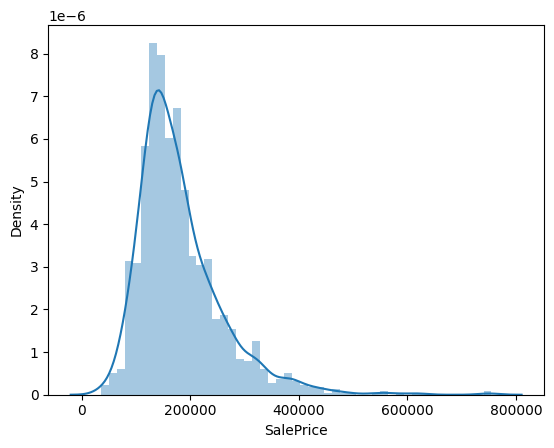

In [21]:
# checking the skewness of target variable SalePrice
sns.distplot(surprise['SalePrice']) #it's skewed

In [22]:
# log transformation of target variable
surprise['SalePrice']=np.log1p(surprise['SalePrice'])



<Axes: xlabel='SalePrice', ylabel='Density'>

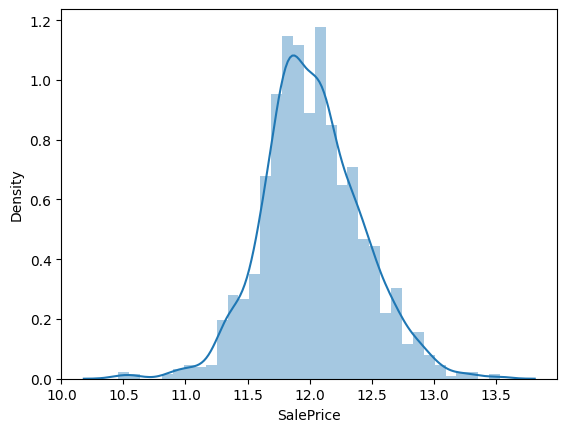

In [23]:
sns.distplot(surprise['SalePrice']) #skewness removed

In [24]:
# correlation matrix
data_numeric = surprise.select_dtypes(include=['float64', 'int64'])
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370454,-0.139766,0.032936,-0.059134,0.027435,0.040199,0.023792,-0.069501,-0.065549,-0.140627,-0.238160,-0.251484,0.307713,0.046524,0.074949,0.003799,-0.002243,0.131354,0.177004,-0.023502,0.281833,0.040274,-0.045232,0.081000,-0.040232,-0.098558,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.073971
LotFrontage,-0.370454,1.000000,0.335967,0.239667,-0.043555,0.120956,0.084492,0.195901,0.232736,0.052264,0.119217,0.381480,0.434368,0.075641,0.031884,0.385219,0.107321,0.006641,0.186534,0.054113,0.245222,-0.005609,0.332606,0.249455,0.062309,0.281378,0.339130,0.088733,0.141819,0.008088,0.064665,0.041087,0.174574,0.005340,0.007413,0.004744,0.353289
LotArea,-0.139766,0.335967,1.000000,0.105786,-0.005665,0.014296,0.013852,0.103302,0.214121,0.111158,-0.002641,0.260962,0.299533,0.051030,0.004773,0.263109,0.158147,0.048034,0.126100,0.014333,0.119700,-0.017796,0.190037,0.271398,-0.025813,0.154893,0.180392,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.257321
OverallQual,0.032936,0.239667,0.105786,1.000000,-0.092243,0.573334,0.551605,0.407075,0.239265,-0.059291,0.308018,0.537523,0.475933,0.295969,-0.030502,0.593021,0.110700,-0.040291,0.551267,0.274328,0.101789,-0.184040,0.427720,0.396455,0.515236,0.600991,0.561980,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.817368
OverallCond,-0.059134,-0.043555,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.125922,-0.046595,0.040132,-0.137008,-0.171796,-0.144646,0.029187,0.025454,-0.079777,-0.055250,0.117749,-0.193929,-0.060371,0.013039,-0.087085,-0.057485,-0.024167,-0.306031,-0.185670,-0.151662,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.036868
YearBuilt,0.027435,0.120956,0.014296,0.573334,-0.375780,1.000000,0.592512,0.312227,0.250465,-0.048903,0.149444,0.393159,0.283056,0.009784,-0.183774,0.199286,0.188374,-0.037990,0.467960,0.241923,-0.070813,-0.174715,0.095401,0.148580,0.776974,0.537866,0.479460,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.586827
YearRemodAdd,0.040199,0.084492,0.013852,0.551605,0.074158,0.592512,1.000000,0.177038,0.129259,-0.067575,0.181520,0.292546,0.241344,0.139607,-0.062356,0.287677,0.120148,-0.012165,0.438733,0.182595,-0.040718,-0.149503,0.191603,0.113360,0.616113,0.420573,0.372012,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.565822
MasVnrArea,0.023792,0.195901,0.103302,0.407075,-0.125922,0.312227,0.177038,1.000000,0.260989,-0.071453,0.113719,0.359798,0.339605,0.174109,-0.068683,0.388012,0.082718,0.027312,0.273397,0.199713,0.102851,-0.038538,0.279724,0.246747,0.245053,0.362119,0.370807,0.160026,0.122287,-0.110065,0.019100,0.062151,0.011903,-0.029550,-0.006916,-0.008263,0.426828
BsmtFinSF1,-0.069501,0.232736,0.214121,0.239265,-0.046595,0.250465,0.129259,0.260989,1.000000,-0.050328,-0.495718,0.521963,0.445473,-0.136697,-0.064604,0.208088,0.649025,0.067281,0.059102,0.005085,-0.107281,-0.081175,0.044529,0.259541,0.149693,0.224342,0.296851,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.372152
BsmtFinSF2,-0.065549,0.052264,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.071453,-0.050328,1.000000,-0.209395,0.104593,0.096948,-0.099146,0.014784,-0.009686,0.158557,0.070904,-0.076306,-0.031922,-0.015696,-0.040795,-0.035170,0.046748,-0.087494,-0.038204,-0.018295,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,0.004835


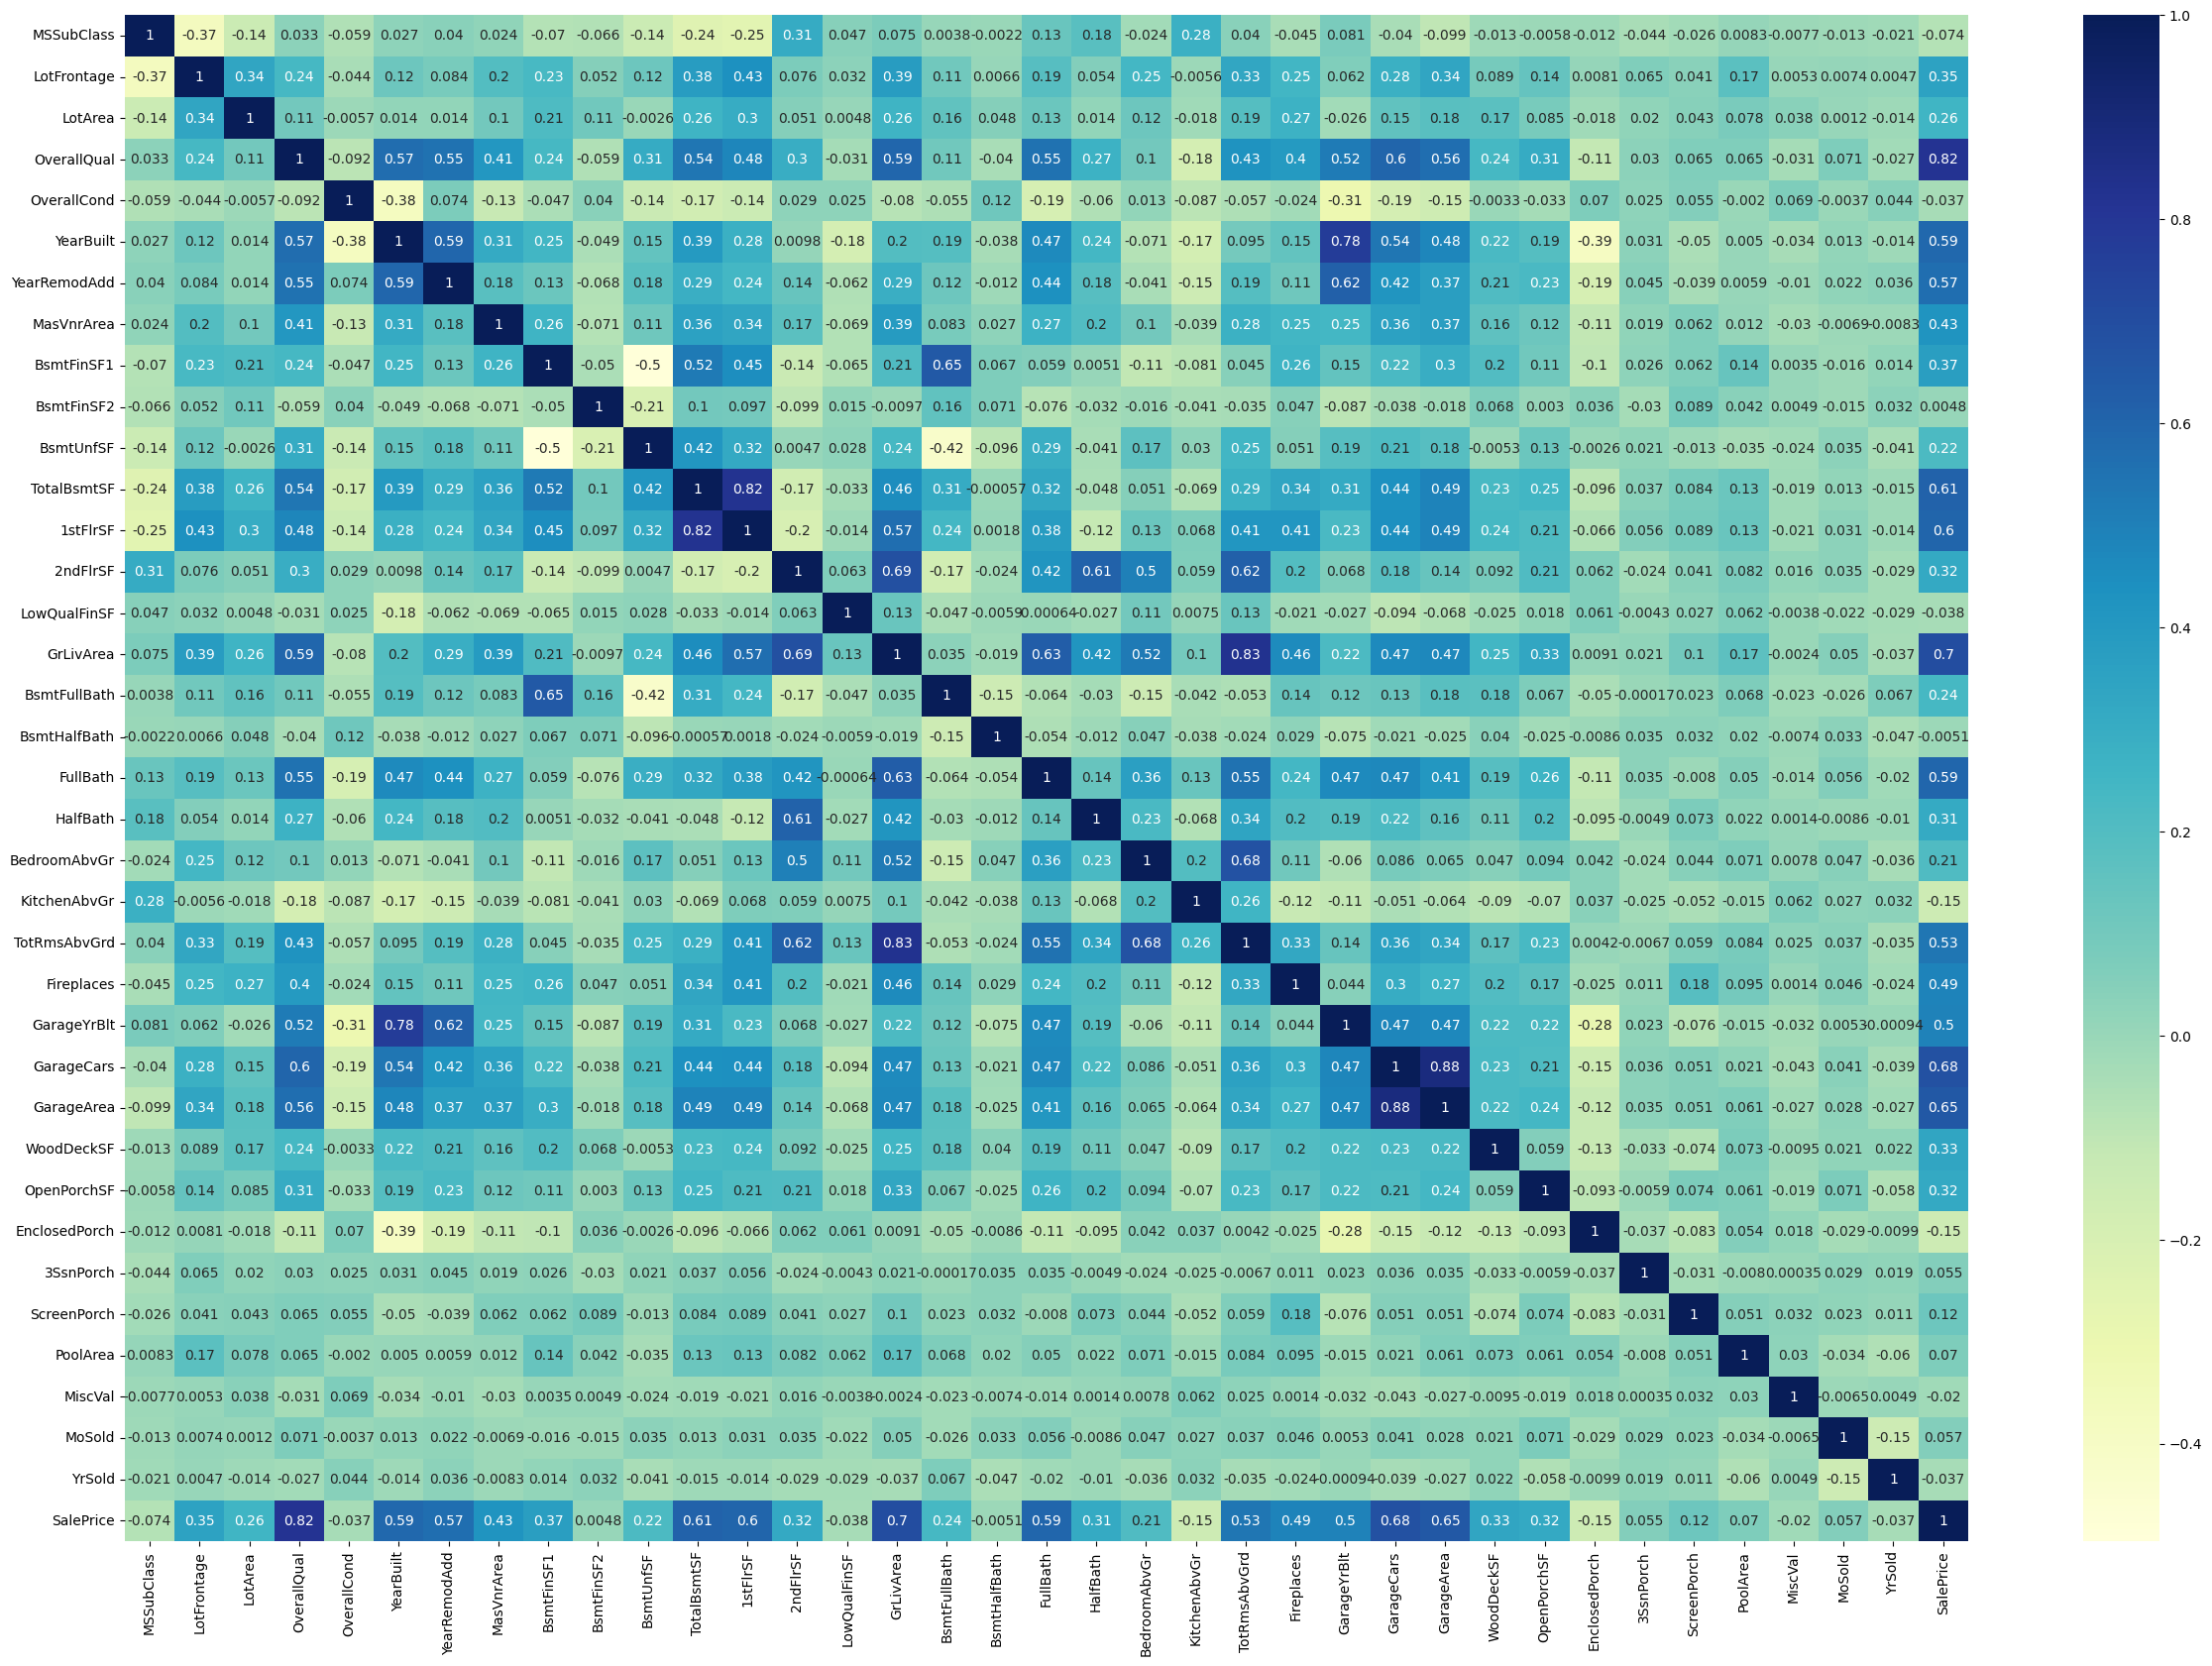

In [25]:
# plotting correlations on a heatmap

plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [26]:
num_cols=data_numeric.columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

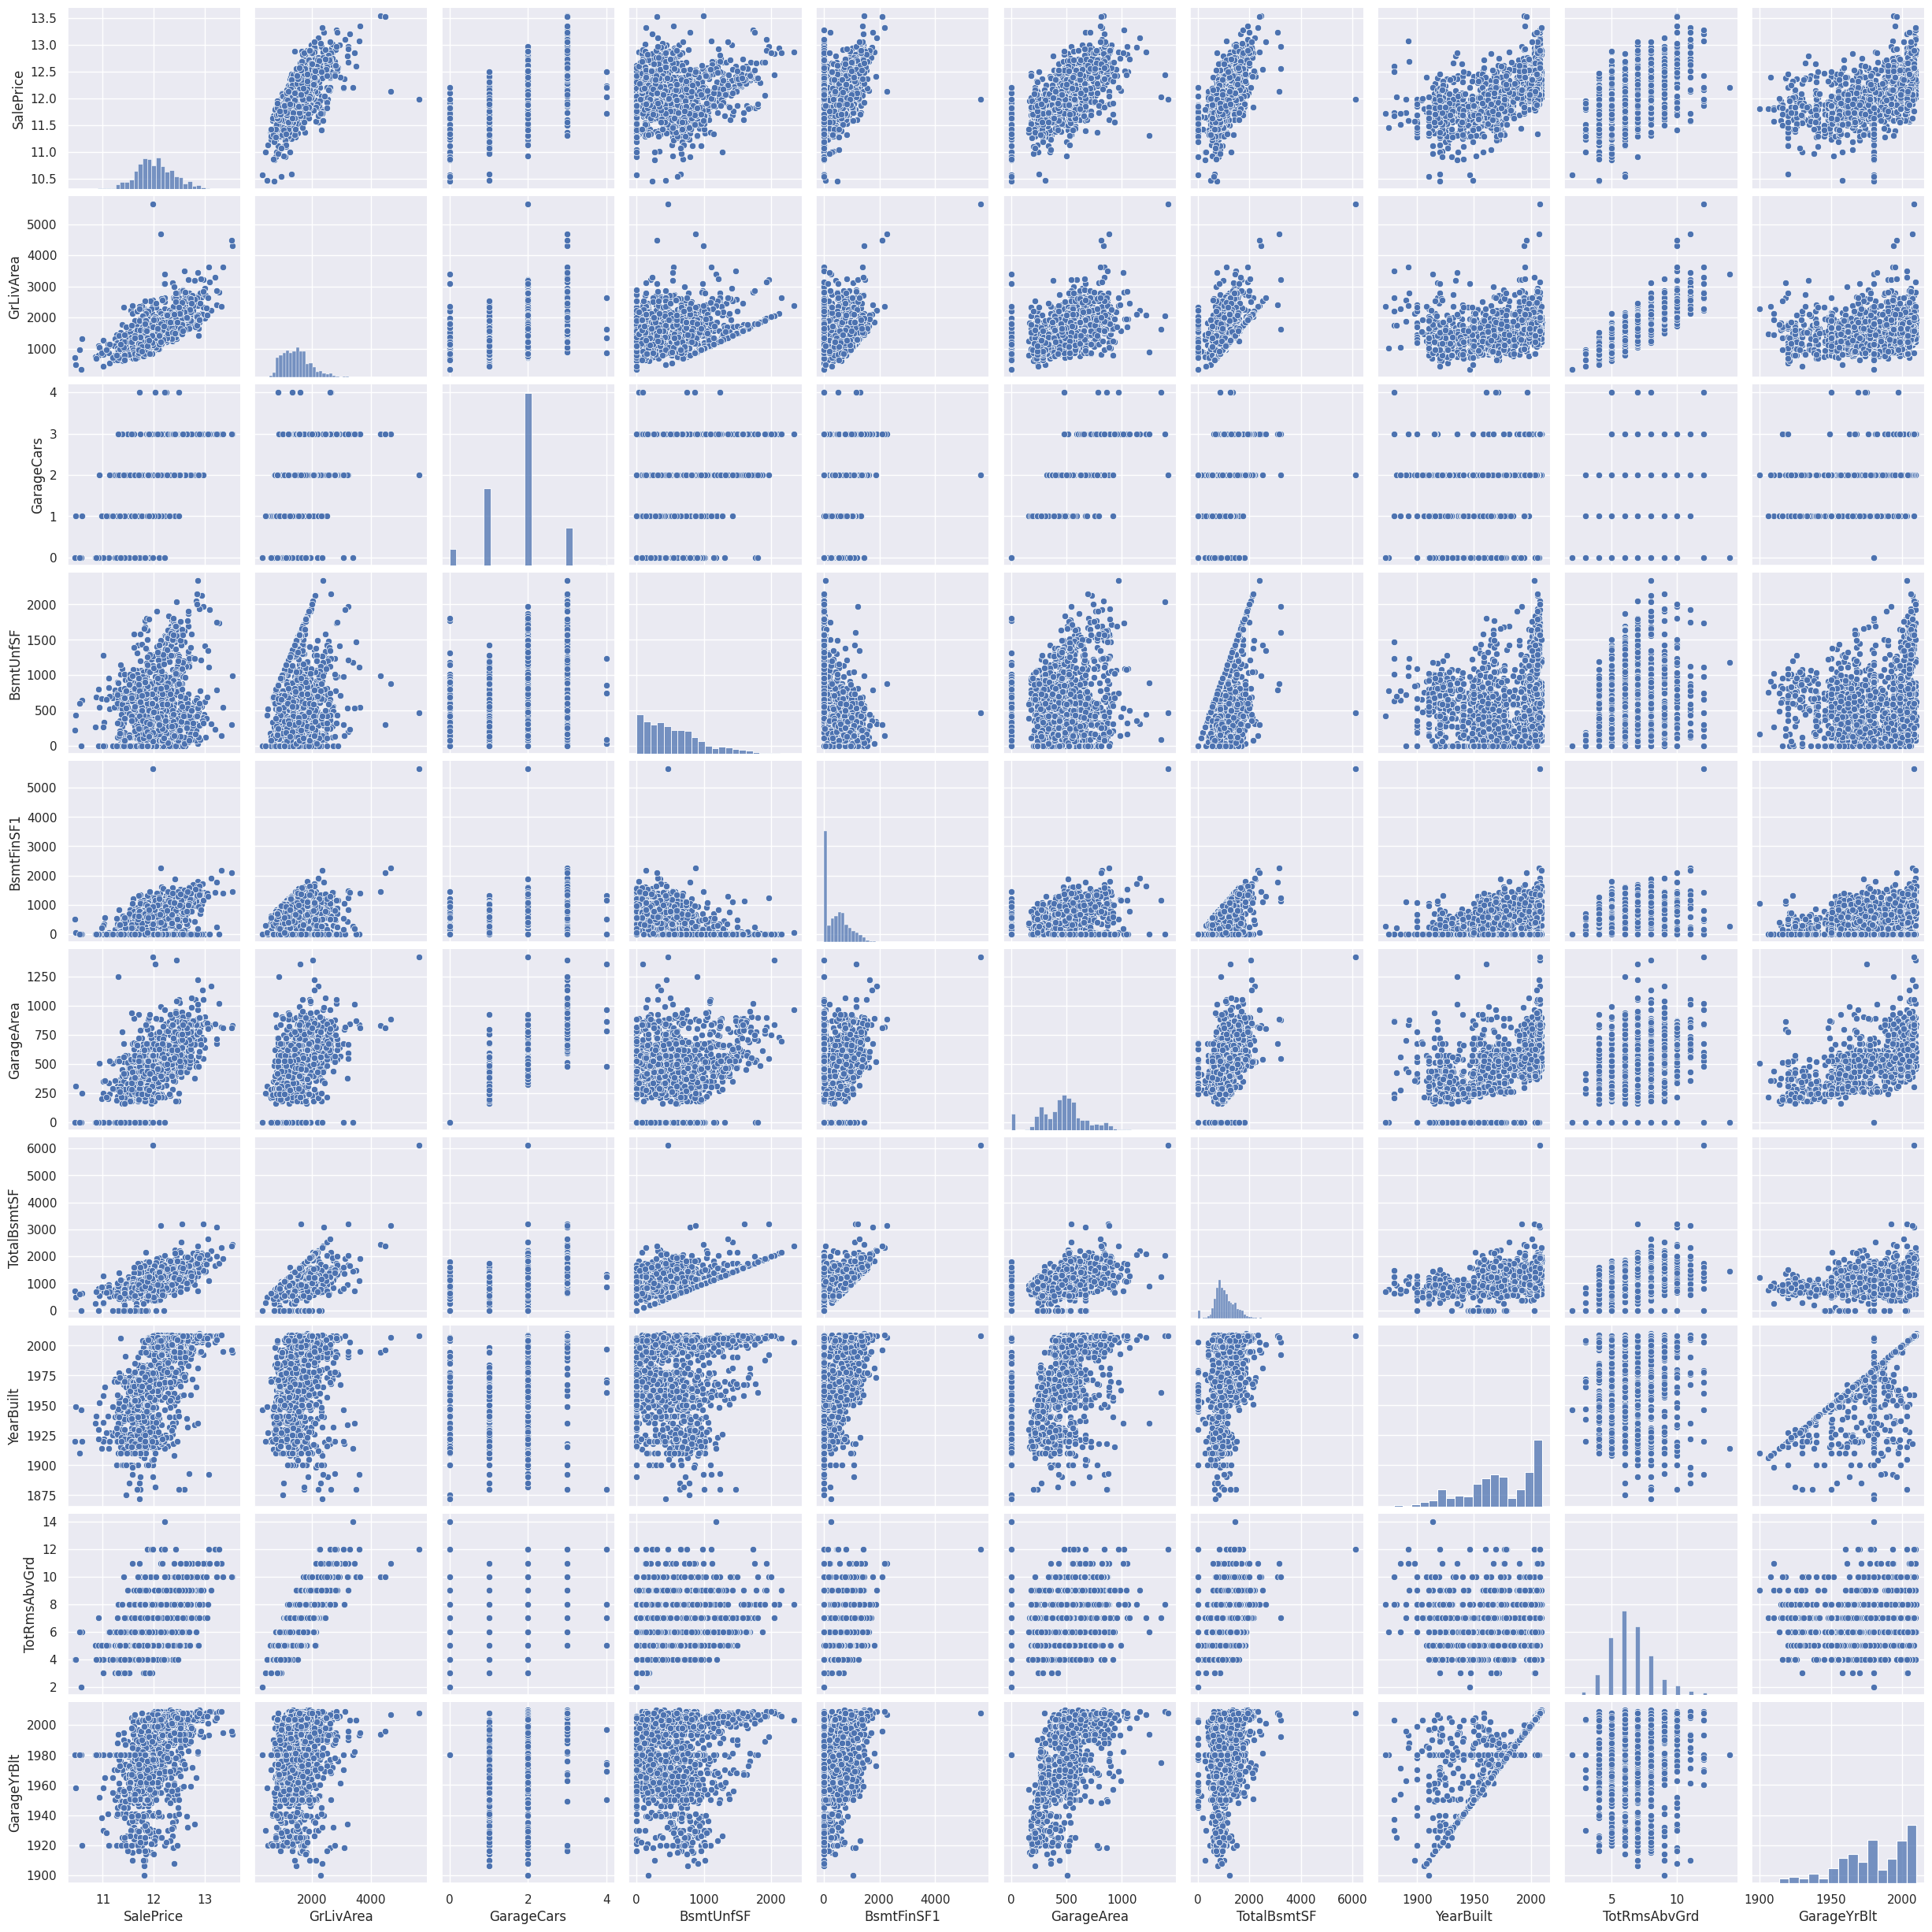

In [27]:
# Checking the same with a pairplot
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(surprise[cols], size = 2.5)
plt.show()

In [28]:
#dropping the non impacting columns
surprise = surprise.drop(['GarageCars'], axis = 1)
surprise = surprise.drop(['BsmtUnfSF'], axis = 1)
surprise = surprise.drop(['TotRmsAbvGrd'], axis = 1)
surprise = surprise.drop(['GarageYrBlt'], axis = 1)



In [29]:
surprise.shape

(1459, 70)

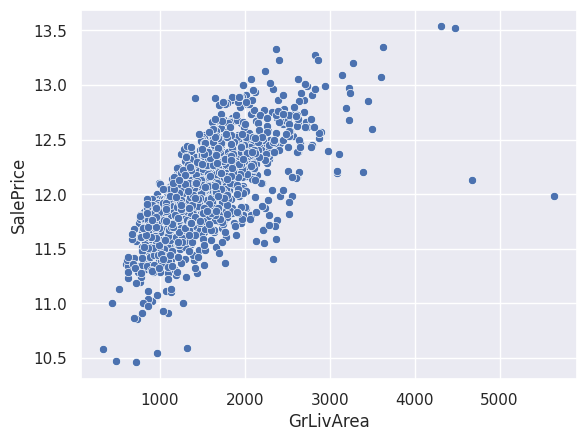

In [30]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=surprise)
plt.show()

In [31]:
# Removing some outliers on lower right side of 'GrLivArea'
surprise = remove_outliers(surprise,'GrLivArea')

In [32]:
# Drieved column PropAge -  Property Age from yearsold - yearbuilt
surprise['PropAge'] = (surprise['YrSold'] - surprise['YearBuilt'])
surprise.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429220,8


In [33]:
surprise = surprise.drop(['YrSold','YearBuilt'], axis = 1)


In [34]:
surprise = surprise.drop(['MoSold','YearRemodAdd'], axis = 1)


In [35]:
#checking distinct value in all num_cols and cat_cols
num_cols = surprise.select_dtypes(include=['float64', 'int64'])
num_cols.columns



Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'PropAge'],
      dtype='object')

In [36]:
cat_cols = surprise.select_dtypes(include=['object'])

In [37]:
for i in num_cols:
    print(surprise[i].value_counts())

MSSubClass
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      56
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: count, dtype: int64
LotFrontage
60.0     150
80.0     110
70.0      94
65.0      74
73.0      69
        ... 
33.0       1
150.0      1
38.0       1
111.0      1
46.0       1
Name: count, Length: 112, dtype: int64
LotArea
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: count, Length: 1046, dtype: int64
OverallQual
5     395
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: count, dtype: int64
OverallCond
5    803
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: count, dtype: int64
MasVnrArea
0.0      855
72.0       8
108.0      8
180.0      8
120.0      7
        ... 
435.0      1
378.0      1
562.0      1
333.0      1
119.0      1
Name: count, 

In [38]:
for i in cat_cols:
    print(surprise[i].value_counts())

MSZoning
RL         1124
RM          214
FV           65
RH           15
C (all)      10
Name: count, dtype: int64
Street
Pave    1422
Grvl       6
Name: count, dtype: int64
LotShape
Reg    911
IR1    470
IR2     38
IR3      9
Name: count, dtype: int64
LandContour
Lvl    1286
Bnk      59
HLS      47
Low      36
Name: count, dtype: int64
Utilities
AllPub    1427
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1034
Corner      253
CulDSac      90
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1353
Mod      62
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      223
CollgCr    149
OldTown    109
Edwards     98
Somerst     86
Gilbert     79
NridgHt     75
Sawyer      74
NWAmes      71
SawyerW     58
BrkSide     58
Mitchel     49
Crawfor     49
IDOTRR      37
Timber      36
NoRidge     33
ClearCr     27
SWISU       23
StoneBr     22
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype:

In [39]:
# dropping un-necessary columns
surprise = surprise.drop(['MiscVal', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Functional' ], axis = 1)


Data Prep

In [40]:
surprise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1428 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1428 non-null   int64  
 1   MSZoning       1428 non-null   object 
 2   LotFrontage    1428 non-null   float64
 3   LotArea        1428 non-null   int64  
 4   Street         1428 non-null   object 
 5   LotShape       1428 non-null   object 
 6   LandContour    1428 non-null   object 
 7   Utilities      1428 non-null   object 
 8   LotConfig      1428 non-null   object 
 9   LandSlope      1428 non-null   object 
 10  Neighborhood   1428 non-null   object 
 11  Condition1     1428 non-null   object 
 12  BldgType       1428 non-null   object 
 13  HouseStyle     1428 non-null   object 
 14  OverallQual    1428 non-null   int64  
 15  OverallCond    1428 non-null   int64  
 16  RoofStyle      1428 non-null   object 
 17  Exterior1st    1428 non-null   object 
 18  Exterior2nd  

In [41]:
num_cols = list(surprise.select_dtypes(include=['float64', 'int64']))
cat_cols = list(surprise.select_dtypes(include=['object']))


In [42]:
# creating Dummy columns to convert categorical into numerical
surprise = pd.get_dummies(surprise, drop_first=True )
surprise.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,12.247699,5,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,12.109016,31,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,12.317171,7,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,11.849405,91,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,12.429220,8,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False


Train Test Split

In [43]:
X = surprise.drop('SalePrice', axis=1)
y = surprise['SalePrice']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)


In [45]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

Model Building

# Ridge Regression

In [62]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021205,0.002025,0.010961,0.002646,0.0001,{'alpha': 0.0001},-0.087867,-0.083052,-0.084926,-0.082901,-0.083099,-0.084369,0.001900,26,-0.062165,-0.061746,-0.060688,-0.062964,-0.061012,-0.061715,0.000814
1,0.044324,0.013927,0.019875,0.001809,0.001,{'alpha': 0.001},-0.087849,-0.083046,-0.084897,-0.082874,-0.083070,-0.084347,0.001901,25,-0.062166,-0.061746,-0.060691,-0.062963,-0.061014,-0.061716,0.000813
2,0.028696,0.008204,0.013326,0.005874,0.01,{'alpha': 0.01},-0.087678,-0.082988,-0.084632,-0.082623,-0.082823,-0.084149,0.001904,24,-0.062176,-0.061748,-0.060713,-0.062952,-0.061043,-0.061726,0.000800
3,0.032753,0.011536,0.012555,0.005225,0.05,{'alpha': 0.05},-0.086963,-0.082749,-0.083802,-0.081814,-0.082420,-0.083549,0.001825,23,-0.062228,-0.061767,-0.060810,-0.062939,-0.061169,-0.061782,0.000756
4,0.038732,0.006497,0.015578,0.003505,0.1,{'alpha': 0.1},-0.086173,-0.082575,-0.083062,-0.081173,-0.082076,-0.083012,0.001700,22,-0.062329,-0.061817,-0.060934,-0.062964,-0.061324,-0.061874,0.000719
5,0.023831,0.009675,0.011247,0.004110,0.2,{'alpha': 0.2},-0.085054,-0.082324,-0.082144,-0.080213,-0.081581,-0.082263,0.001579,21,-0.062547,-0.061938,-0.061165,-0.063048,-0.061630,-0.062065,0.000665
6,0.039084,0.001112,0.018986,0.002628,0.3,{'alpha': 0.3},-0.084273,-0.082121,-0.081611,-0.079483,-0.081208,-0.081739,0.001546,19,-0.062749,-0.062059,-0.061358,-0.063193,-0.061882,-0.062248,0.000649
7,0.049696,0.007348,0.023431,0.003724,0.4,{'alpha': 0.4},-0.083684,-0.081948,-0.081214,-0.078896,-0.080901,-0.081329,0.001552,18,-0.062926,-0.062191,-0.061539,-0.063366,-0.062103,-0.062425,0.000645
8,0.068454,0.007116,0.031887,0.007444,0.5,{'alpha': 0.5},-0.083177,-0.081822,-0.080904,-0.078402,-0.080641,-0.080989,0.001569,17,-0.063092,-0.062328,-0.061712,-0.063537,-0.062297,-0.062593,0.000644
9,0.065464,0.012535,0.029434,0.005315,0.6,{'alpha': 0.6},-0.082734,-0.081727,-0.080717,-0.077975,-0.080439,-0.080718,0.001593,16,-0.063257,-0.062460,-0.061873,-0.063700,-0.062460,-0.062750,0.000648


The best rank test score is for Alpha = 9.0



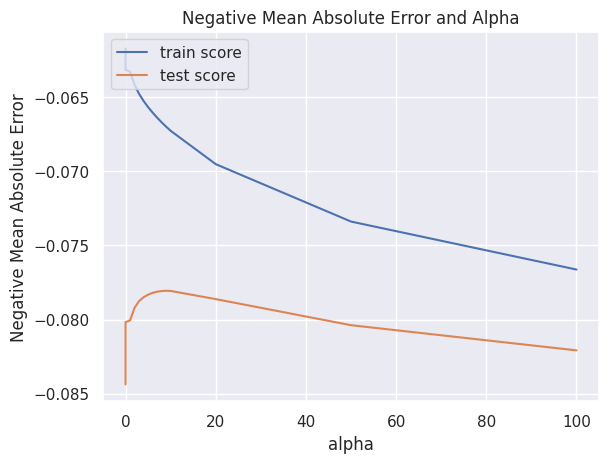

In [64]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [65]:
alpha = 9
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.27167615e-02,  1.06411077e-02,  2.36625952e-02,  7.34411504e-02,
        4.88342604e-02,  3.15478335e-03,  3.62120654e-02,  9.82634522e-03,
        3.15830335e-02,  3.77422289e-02,  4.11310455e-02, -8.43988239e-04,
        6.76566860e-02,  1.20368590e-02, -1.23775259e-03,  1.91683621e-02,
        1.32344654e-02,  2.18586255e-03, -1.33352216e-02,  1.49900014e-02,
        2.31104767e-02,  1.17228835e-02,  6.18835592e-03,  8.91263988e-03,
        7.13633336e-03,  1.23877879e-02,  2.97783084e-03, -6.29456513e-02,
        3.85289973e-02,  1.00615591e-02,  6.77161513e-02,  7.50856716e-03,
        1.40119028e-02, -4.26337855e-03,  2.75149821e-03, -9.24339173e-04,
        2.16045171e-02, -2.60680061e-02,  4.06246102e-03, -9.36781987e-03,
        1.61547474e-02, -3.82145618e-03, -1.76401152e-02, -1.87498180e-02,
        2.53032209e-02, -5.68857224e-02, -3.40982458e-03, -1.05899233e-02,
        3.73929120e-02,  7.71707424e-03, -1.60095735e-02,  8.47001393e-02,
       -4.62967789e-02, -

In [66]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")


In [67]:
mod = list(zip(cols, model_parameters))
para_ridge = pd.DataFrame(mod)
para_ridge.columns = ['Variable', 'Coeff']
para_ridge = para_ridge.sort_values((['Coeff']), axis = 0, ascending = False)
para_ridge = pd.DataFrame(para[(para_ridge['Coeff'] != 0)])
para_ridge

,Variable,Coeff
0,constant,11.823
200,SaleCondition_Partial,0.117
199,SaleCondition_Normal,0.101
198,SaleCondition_Family,0.090
197,SaleCondition_Alloca,0.086
196,SaleCondition_AdjLand,0.077
195,SaleType_WD,0.059
194,SaleType_Oth,0.053
193,SaleType_New,0.052
192,SaleType_ConLw,0.045


In [68]:
print("ridge_train",ridge.score(X_train,y_train))
print("ridge_test",ridge.score(X_test,y_test))

ridge_train 0.9371090011472443
ridge_test 0.8952614159607577


# Lasso Regression

In [69]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.362235,0.127264,0.018712,0.009709,0.0001,{'alpha': 0.0001},-0.081582,-0.080970,-0.080439,-0.075891,-0.081238,-0.080024,0.002100,2,-0.064128,-0.063348,-0.062984,-0.064599,-0.063576,-0.063727,0.000573
1,0.094006,0.006474,0.019954,0.001649,0.001,{'alpha': 0.001},-0.075453,-0.078096,-0.086715,-0.076010,-0.080373,-0.079329,0.004079,1,-0.074147,-0.073075,-0.071104,-0.073515,-0.071368,-0.072642,0.001201
2,0.061916,0.010107,0.022357,0.004209,0.01,{'alpha': 0.01},-0.081860,-0.087621,-0.102542,-0.089665,-0.088249,-0.089987,0.006818,3,-0.089894,-0.088173,-0.084795,-0.087851,-0.087352,-0.087613,0.001648
3,0.052911,0.005919,0.019546,0.003349,0.05,{'alpha': 0.05},-0.114294,-0.112756,-0.132713,-0.112278,-0.113274,-0.117063,0.007854,4,-0.117421,-0.116368,-0.114854,-0.116613,-0.116562,-0.116364,0.000836
4,0.052491,0.006710,0.018104,0.000600,0.1,{'alpha': 0.1},-0.153977,-0.150362,-0.167220,-0.145902,-0.147077,-0.152908,0.007688,5,-0.153006,-0.154315,-0.150255,-0.151339,-0.153479,-0.152479,0.001476
5,0.051684,0.015944,0.014175,0.004111,0.2,{'alpha': 0.2},-0.225723,-0.236008,-0.231108,-0.216359,-0.227105,-0.227261,0.006520,6,-0.225601,-0.228596,-0.224554,-0.227124,-0.228020,-0.226779,0.001503
6,0.050265,0.004364,0.022927,0.011120,0.3,{'alpha': 0.3},-0.287799,-0.296787,-0.294139,-0.281611,-0.295672,-0.291202,0.005716,7,-0.289285,-0.290324,-0.288571,-0.293339,-0.292036,-0.290711,0.001756
7,0.037470,0.018622,0.012311,0.003684,0.4,{'alpha': 0.4},-0.299072,-0.305015,-0.304758,-0.290894,-0.303343,-0.300616,0.005307,8,-0.300670,-0.298606,-0.299391,-0.302748,-0.299107,-0.300105,0.001487
8,0.047564,0.002255,0.019387,0.003139,0.5,{'alpha': 0.5},-0.299072,-0.305015,-0.304758,-0.290894,-0.303343,-0.300616,0.005307,8,-0.300670,-0.298606,-0.299391,-0.302748,-0.299107,-0.300105,0.001487
9,0.044744,0.014259,0.016599,0.004536,0.6,{'alpha': 0.6},-0.299072,-0.305015,-0.304758,-0.290894,-0.303343,-0.300616,0.005307,8,-0.300670,-0.298606,-0.299391,-0.302748,-0.299107,-0.300105,0.001487


The best rank test score is for Alpha = 0.001


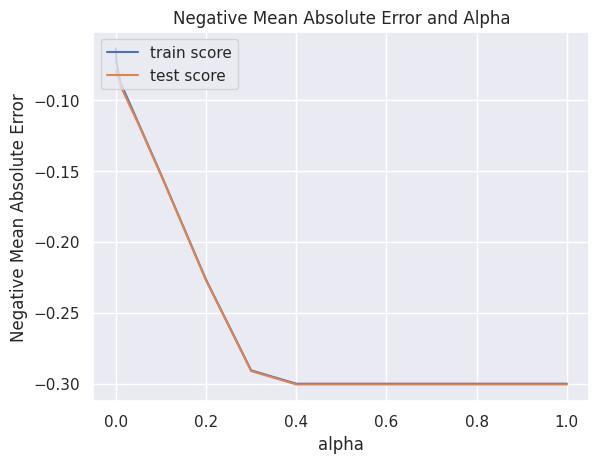

In [71]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [72]:
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_


array([-9.07667736e-03,  1.30506123e-02,  1.84658246e-02,  8.64436349e-02,
        5.31370675e-02,  1.08257513e-03,  3.72383022e-02,  4.44181811e-03,
        3.97111641e-02,  0.00000000e+00,  0.00000000e+00, -4.46310645e-03,
        1.17077556e-01,  1.34160604e-02, -0.00000000e+00,  1.44047310e-02,
        9.92279552e-03, -2.71085489e-03, -1.23563868e-02,  1.51731388e-02,
        2.77734123e-02,  1.24010991e-02,  6.48558267e-03,  6.96107223e-03,
        6.52781214e-03,  1.21937692e-02,  4.38658916e-04, -7.20395869e-02,
        0.00000000e+00,  0.00000000e+00,  5.90106966e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.33436176e-03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.50226670e-02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        3.07269559e-02,  0.00000000e+00, -0.00000000e+00,  8.98844593e-02,
       -2.47003879e-02, -

In [75]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")


In [76]:
mod = list(zip(cols, model_parameters))
para_lasso = pd.DataFrame(mod)
para_lasso.columns = ['Variable', 'Coeff']
para_lasso = para.sort_values((['Coeff']), axis = 0, ascending = False)
para_lasso = pd.DataFrame(para_lasso[(para_lasso['Coeff'] != 0)])
para_lasso

,Variable,Coeff
0,constant,11.823
200,SaleCondition_Partial,0.117
199,SaleCondition_Normal,0.101
198,SaleCondition_Family,0.090
197,SaleCondition_Alloca,0.086
196,SaleCondition_AdjLand,0.077
195,SaleType_WD,0.059
194,SaleType_Oth,0.053
193,SaleType_New,0.052
192,SaleType_ConLw,0.045


In [77]:
print("lasso_train",lasso.score(X_train,y_train))
print("lasso_test",lasso.score(X_test,y_test))


lasso_train 0.9273866659065383
lasso_test 0.8954728407903307


# Conclusion

## Alpha Values
###### -- Ridge Regression --> 9.0
###### -- Lasso Regression --> 0.001


## Scores
###### -- Ridge train --> 0.94
###### -- Ridge test --> 0.89

###### -- Lasso train --> 0.93
###### -- Lasso test --> 0.89

#### The Surprise Housing company should consider the above positive and negative impacting parameters acording to the weightages derived.


